In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# PAM4 encoding function
def pam4_encode(bits):
    """Encode bitstream into PAM4 signal"""
    symbols = np.zeros(len(bits) // 2)
    for i in range(len(symbols)):
        if bits[2*i] == 0 and bits[2*i+1] == 0:
            symbols[i] = -3
        elif bits[2*i] == 0 and bits[2*i+1] == 1:
            symbols[i] = -1
        elif bits[2*i] == 1 and bits[2*i+1] == 0:
            symbols[i] = 1
        else:
            symbols[i] = 3
    return symbols

# PAM4 decoding function
def pam4_decode(symbols):
    """Decode PAM4 signal into bitstream"""
    bits = np.zeros(2*len(symbols), dtype=int)
    for i in range(len(symbols)):
        if symbols[i] < 0:
            bits[2*i] = 0
            bits[2*i+1] = 0 if symbols[i] < -2 else 1
        else:
            bits[2*i] = 1
            bits[2*i+1] = 0 if symbols[i] < 2 else 1
    return bits

# Function to add Gaussian noise to signal
def add_noise(symbols, snr):
    """Add Gaussian noise to signal with given SNR"""
    signal_power = np.mean(np.abs(symbols)**2)
    noise_power = signal_power / (10**(snr/10))
    noise = np.random.normal(scale=np.sqrt(noise_power), size=len(symbols))
    return symbols + noise


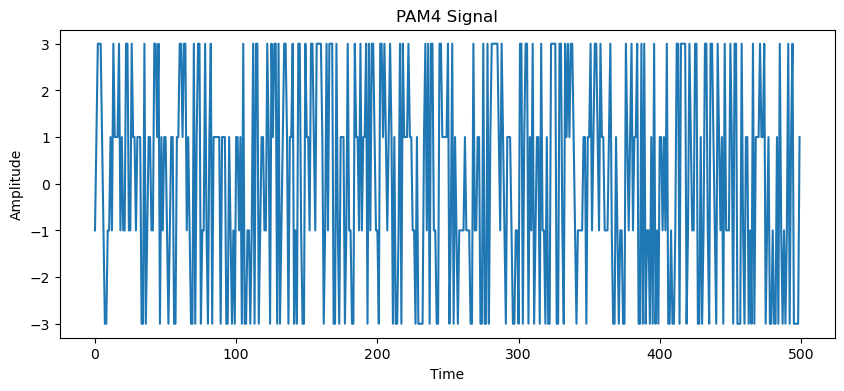

In [2]:
# Generate random bitstream
np.random.seed(0)
bits = np.random.randint(0, 2, 1000)

# Encode bitstream into PAM4 signal
symbols = pam4_encode(bits)

# Normal plot of PAM4 signal
plt.figure(figsize=(10, 4))
plt.plot(symbols)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('PAM4 Signal')
plt.show()

In [18]:
# Eye diagram of PAM4 signal
samples_per_symbol = 4
samples_per_bit = 2 * samples_per_symbol
num_bits = len(bits)
num_symbols = len(symbols)
num_samples = num_symbols * samples_per_symbol
num_bins = num_symbols // samples_per_symbol
samples = np.zeros((num_bins, samples_per_bit))
for i in range(num_bins):
    for j in range(samples_per_bit):
        index = i * samples_per_symbol + j
        samples[i, j] = symbols[index]

plt.figure(figsize=(10, 4))
plt.plot(samples.T, color='blue', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Eye Diagram of PAM4 Signal')
plt.show()

IndexError: index 500 is out of bounds for axis 0 with size 500

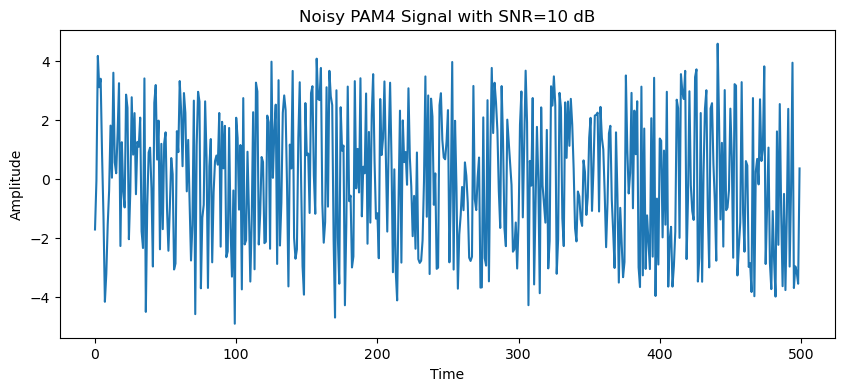

In [11]:
# Add Gaussian noise to PAM4 signal
snr = 10 # dB
noisy_symbols = add_noise(symbols, snr)

# Normal plot of noisy PAM4 signal
plt.figure(figsize=(10, 4))
plt.plot(noisy_symbols)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Noisy PAM4 Signal with SNR={snr} dB')
plt.show()